In [1]:
#setup
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
from mpl_toolkits import mplot3d
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')
import re
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#keys
origin_time_key = 'Origin Time'
epicenter_longitude_key = 'EpicenterLongitude'
epicenter_latitude_key = 'EpicenterLatitude'
depth_key = 'Depth'
magnitude_key = 'Magnitude'
station_code_key = 'StationCode'
station_name_key = 'StationName'
station_longitude_key = 'StationLongitude'
station_latitude_key = 'StationLatitude'
instrument_kind_key = 'InstrumentKind'
start_time_key = 'StartTime'
record_length_key = 'RecordLength'
sample_rate_key = 'SampleRate'
amplitude_unit_key = 'AmplitudeUnit'
amplitude_max_u_key = 'AmplitudeMAX. U'
amplitude_max_n_key = 'AmplitudeMAX. N'
amplitude_max_e_key = 'AmplitudeMAX. E'

earthquake_column_names_dict = {origin_time_key: 'origin_time',
                               epicenter_longitude_key: 'epicenter_longitude',
                               epicenter_latitude_key: 'epicenter_latitude',
                               depth_key: 'depth',
                               magnitude_key: 'magnitude',
                               station_code_key: 'station_code',
                               station_name_key: 'station_name',
                               station_longitude_key: 'station_longitude',
                               station_latitude_key: 'station_latitude',
                               instrument_kind_key: 'instrument_kind',
                               start_time_key: 'start_time',
                               record_length_key: 'record_length',
                               sample_rate_key: 'sample_rate',
                               amplitude_unit_key: 'amplitude_unit',
                               amplitude_max_u_key: 'amplitude_max_u',
                               amplitude_max_n_key: 'amplitude_max_n',
                               amplitude_max_e_key: 'amplitude_max_e'}

earthquake_keys = [origin_time_key, epicenter_longitude_key, epicenter_latitude_key, depth_key, magnitude_key, \
                  station_code_key, station_name_key, station_longitude_key, station_latitude_key, \
                   instrument_kind_key, start_time_key, record_length_key, sample_rate_key, amplitude_unit_key, \
                  amplitude_max_u_key, amplitude_max_n_key, amplitude_max_e_key]

In [4]:
#method for creating a dictionary with the lines of the file
def earthquake_dict(lines_array):
    earthquake = {}
    
    readData_flag = 0
    time = []
    ux = []
    nx = []
    ex = []
    for line in earthquake_array:
        if ':' in line:
            for key in earthquake_keys:
                if key in line:
                    if '~' in line:
                        range_string = line.split(': ')[1]
                        lower = (range_string.split('~')[1]).strip()
                        upper = (range_string.split('~')[0]).strip()
                        earthquake[earthquake_column_names_dict[key] + '_lower'] = float(lower)
                        earthquake[earthquake_column_names_dict[key] + '_upper'] = float(upper)
                    else:
                        try:
                            value = float((line.split(': ')[1]).strip())
                            earthquake[earthquake_column_names_dict[key]] = value
                        except ValueError:
                            earthquake[earthquake_column_names_dict[key]] = (line.split(': ')[1]).strip()
        if readData_flag == 1:
            if line != '':
                t, u, n, e = line.split()
                time.append(t)
                ux.append(u)
                nx.append(n)
                ex.append(e)
        if 'ata' in line and 'equ' not in line:
            readData_flag = 1
    
    earthquake['time'] = np.asarray(time, dtype=np.float64)
    earthquake['ua'] = np.asarray(ux, dtype=np.float64)
    earthquake['na'] = np.asarray(nx, dtype=np.float64)
    earthquake['ea'] = np.asarray(ex, dtype=np.float64)
    return earthquake

In [6]:
#add data for the earthquakes
#get files for eq_cwb directory
earthquakes = []
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII'):
    path = os.getcwd() + '/data/earthquake/eq_cwb/2017ASCII/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file,"r") as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]
                
#get files for eq_ncree directory
for directory in os.listdir(os.getcwd() + '/data/earthquake/eq_ncree/106'):
    path = os.getcwd() + '/data/earthquake/eq_ncree/106/' + directory
    if os.path.isdir(path):
        for file in os.listdir(path):
            with open(path + '/' + file, encoding='windows-1254') as file:
                earthquake_array = [string for string in file.read().split('\n')]
                earthquakes += [earthquake_dict(earthquake_array)]

earthquake_df = pd.DataFrame.from_dict(earthquakes)
print('Length:', len(earthquake_df))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 233: invalid start byte

In [ ]:
print('Length unique earthquakes:', len(earthquake_df.start_time.unique()))

In [ ]:
earthquake_df.info()

In [ ]:
earthquake_df.to_pickle('data/earthquake/earthquakes_withData.pkl')

In [ ]:
tainan_station = pd.DataFrame()

tainan_station = earthquake_df[(earthquake_df.station_latitude > 22.867997138821966) & 
                               (earthquake_df.station_latitude < 23.42151168812283) &
                               (earthquake_df.station_longitude > 120.0206129877014) &
                               (earthquake_df.station_longitude < 120.66239894252767)]

In [ ]:
tainan_station.to_pickle('data/earthquake/earthquakes_Tainan_withData.pkl')

---

In [ ]:
tainan_station.head()

In [ ]:
tainan_station.size

In [13]:
x = tainan_station.iloc[0].time
y = tainan_station.iloc[0].ua

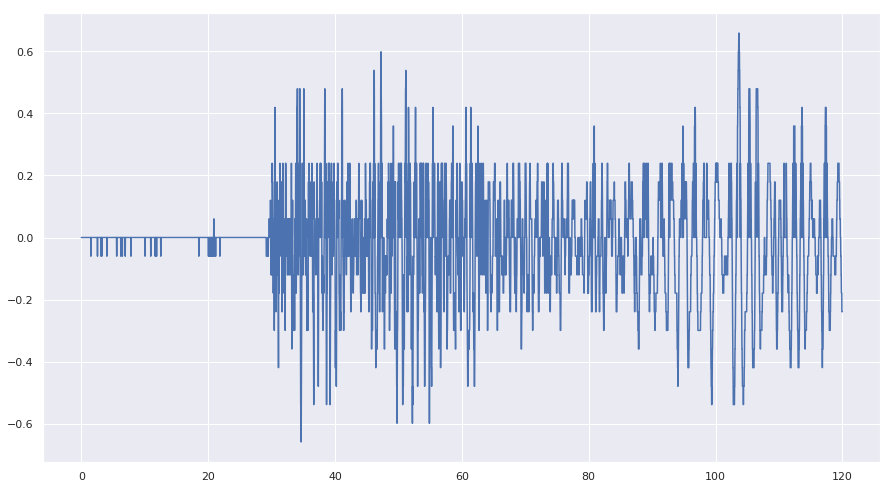

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(x,y)

In [ ]:
tainan_station.station_name.unique()

In [30]:
import matplotlib.pyplot as plt
import geopandas as gp
import numpy as np
%matplotlib inline  

villages_shp = gp.read_file("./data/geographicPlot/VILLAGE_MOI_121_1071031.shp", encoding='utf8') #全台灣村里界圖
tainan_shp = villages_shp.query('COUNTYNAME=="臺南市"') #臺中市村里界圖

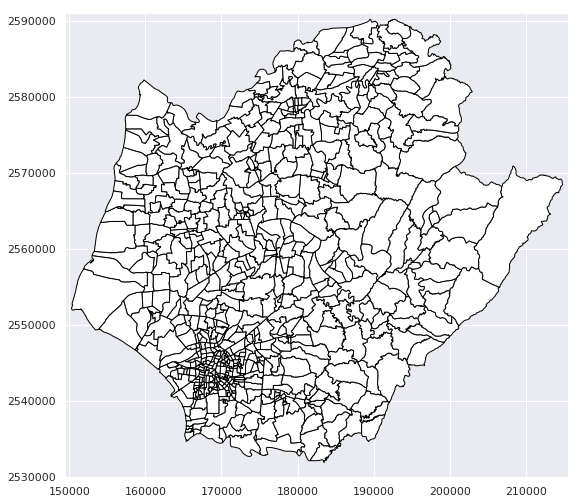

In [33]:
# We restrict to South America.
plt.rcParams['figure.figsize'] = [9, 9]

ax = tainan_shp.plot(color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
# geo_banks.plot(ax=ax, color='xkcd:light red', marker='.', markersize=5)
# ylim((, ))
axes = plt.gca()
axes.set_xlim([149500,215500])
axes.set_ylim([2530000,2591000])
plt.show()